In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np

In [2]:
data = pd.read_csv("../knn/test", names=["gender", "height", "weight"])

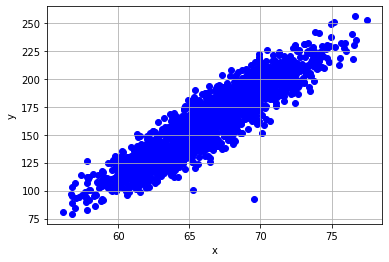

In [3]:
%matplotlib inline 
plt.scatter(data['height'], data['weight'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [4]:
def get_regression_line(data, x, y):
#     mean_y = (sum(data['weight'])/len(data['weight']))
#     mean_x =  (sum(data['height'])/len(data['height']))
    
    mean_x =  (sum(x)/len(x))
    mean_y =  (sum(y)/len(y))

    m = 0
    b = 0
    top = 0
    bottom = 0
    for index, row in data.iterrows():
        current_x = row['height']
        current_y = row['weight']
        top += ((current_x-mean_y)*(current_y-mean_y))
        bottom += (current_x - mean_x) ** 2
    m = top/bottom
    b = mean_y-(m*mean_x)
    return m, b, mean_x, mean_y

In [5]:
small_data = data.head(100)
x = small_data['height']
y = small_data['weight']

In [6]:
m, b, mean_x, mean_y = get_regression_line(small_data, x, y)

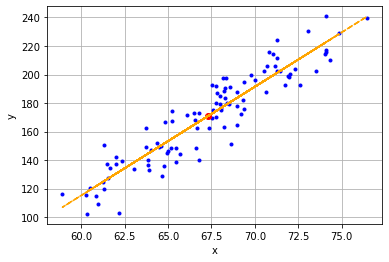

In [7]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b + m * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

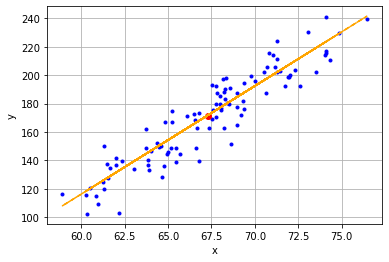

In [8]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b+1 + m * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [9]:
m

7.615096323553024

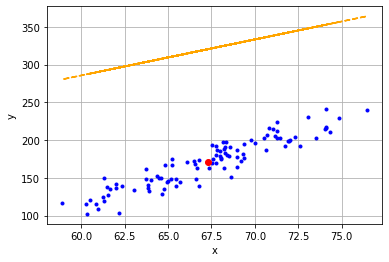

In [10]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, 4.76 * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

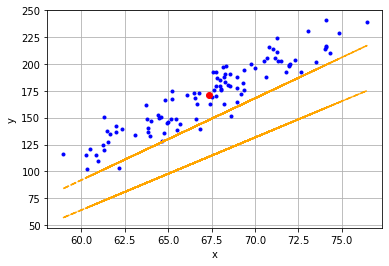

In [11]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b + 6.76 * x ,'--', color='orange')
plt.plot(x, -365 + 7.61509 * x ,'--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

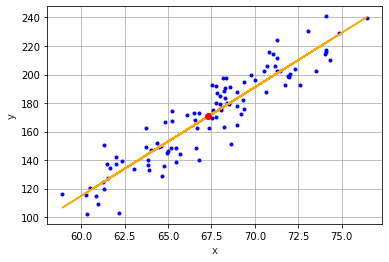

In [12]:
y_g = 7.61509*x+(-342)
plt.plot(x, y, '.', color='b')
plt.plot(x, y_g, 'orange', label='y=2x+1')
plt.plot(mean_x, mean_y, color='r', marker='o' )
# plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
# plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [13]:
def sum_sq_residuals(data, m, b, x, y):
    predictions = []
    predicted = 0
    sqr = 0
    for index, row in data.iterrows():
        current_x = row['height']
        predicted = (m*(current_x)+b)
        predictions.append(predicted)
    data['predicted'] = predictions
    for index, row in data.iterrows():
        current_y = row['weight']
        predicted_y = row['predicted']
        sqr += ((current_y - predicted_y) ** 2)
    %matplotlib inline 
    plt.plot(data['height'], data['weight'], '.', color='b')
    plt.plot(data['height'], data['predicted'], '.', color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show();
    return sqr 

/Users/GaelGil/Desktop/GitRepos/algorithms/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


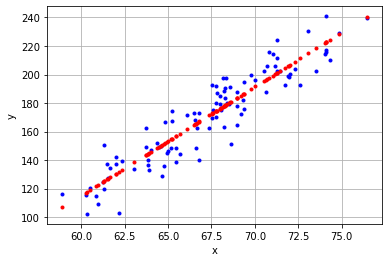

14159.94041740034

In [14]:
sum_sq_residuals(small_data, m, b, x,y)

/Users/GaelGil/Desktop/GitRepos/algorithms/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


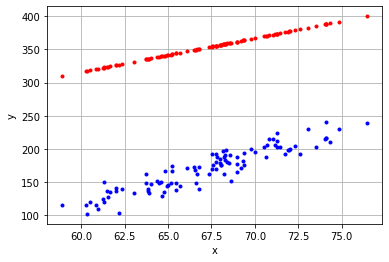

3348232.034205128


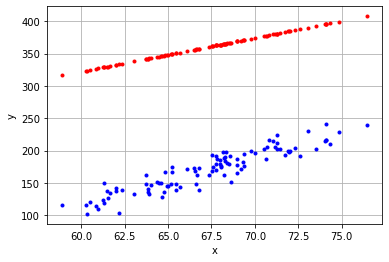

3597524.6065009083


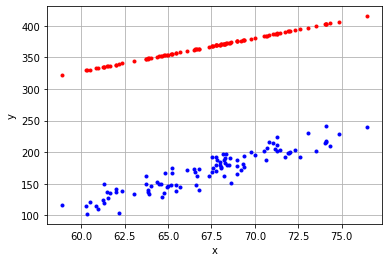

3855915.785637575


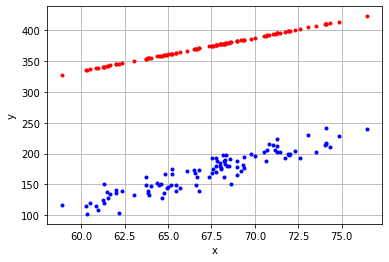

4123405.571615137


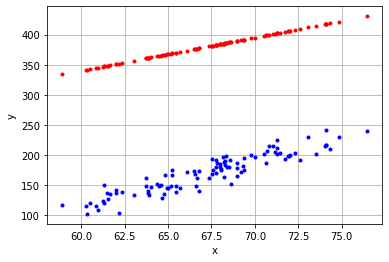

4399993.964433586


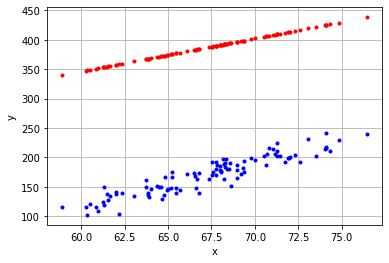

4685680.964092923


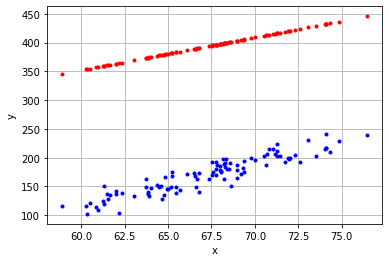

4980466.570593152


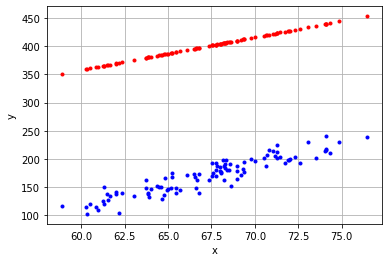

5284350.783934272


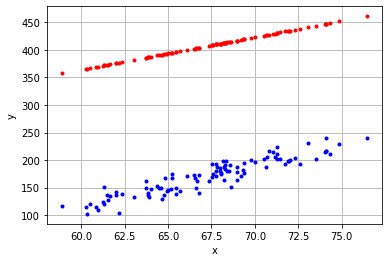

5597333.60411628


In [17]:
for i in range(1,10):
    print(sum_sq_residuals(small_data, m+i/10, b, x,y))


$error = 
\sum_{i=1}^n 
(y'-y)^2
$

$error =  \sum_{i=1}^n (mx+b - y)^2$


$\frac{d}{dm} = (mx+b - y)^2 = \frac{d}{dm}[(mx+b -y)^2] =  2(mx+b - y)*\frac{d}{dm}[(mx+b-y)] = 2(mx+b -y)*x = 2(y'-y)x$

$\frac{d}{db} = (mx+b - y)^2 = 2(y'-y) $ 

In [ ]:
def gradient_descent(data, x, y, l_rate):
 